data4/프로야구.csv 를 이용하여 아래를 작성하시요.

target: 2018년 연봉 
나머지:feature(선수명은 제거)

1) SGDRegress 모델의 r2 점수(train, test )를 출력하시요.

2) 
heatmap을그리고
다중공선성 컬럼을 확인하고
다중공선성이 높은 컬럼을 제거후
SGDRegress  모델의 r2 점수(train, test )를 출력하시요.

3) Lasso 모델을 이용하여 r2 점수(train, test )를 출력하시요.

4,5,6번  은 문제를 만들어서 데이터를 분석하시요 ( 예를 들어 연봉이 가장높은 top 5 선수명 연봉등)
4. [KIA,20,6,0,0,0,31,31,193.1,7.36,2.09,0.79,0.332,72.1,3.44,6.54,3.94,3.82,5.64,150000]
의 연봉(2018)을 예측하시오

5. 팀별 평균 연봉(2018) Top5 를 구하시오.

6. 팀별 연봉상승률(2017->2018)을 구하시오.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.datasets import load_boston, load_iris

from sklearn.linear_model import Ridge,Lasso,ElasticNet, LinearRegression, SGDRegressor
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
from sklearn.pipeline import Pipeline

from sklearn.preprocessing import StandardScaler

from sklearn.neural_network import MLPRegressor
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import OneHotEncoder, LabelEncoder

from statsmodels.stats.outliers_influence import variance_inflation_factor

import mglearn
import matplotlib.pyplot as plt
import matplotlib
matplotlib.rcParams['font.family']='Malgun Gothic'
matplotlib.rcParams['axes.unicode_minus'] = False

import warnings
warnings.simplefilter('ignore')

In [2]:
# 데이터 불러오기
baseball_df = pd.read_csv('../data4/프로야구.csv')
baseball_df.head()

,선수명,팀명,승,패,세,홀드,블론,경기,선발,이닝,...,홈런/9,BABIP,LOB%,ERA,RA9-WAR,FIP,kFIP,WAR,연봉(2018),연봉(2017)
0,켈리,SK,16,7,0,0,0,30,30,190.0,...,0.76,0.342,73.7,3.60,6.91,3.69,3.44,6.62,140000,85000
1,소사,LG,11,11,1,0,0,30,29,185.1,...,0.53,0.319,67.1,3.88,6.80,3.52,3.41,6.08,120000,50000
2,양현종,KIA,20,6,0,0,0,31,31,193.1,...,0.79,0.332,72.1,3.44,6.54,3.94,3.82,5.64,230000,150000
3,차우찬,LG,10,7,0,0,0,28,28,175.2,...,1.02,0.298,75.0,3.43,6.11,4.20,4.03,4.63,100000,100000
4,레일리,롯데,13,7,0,0,0,30,30,187.1,...,0.91,0.323,74.1,3.80,6.13,4.36,4.31,4.38,111000,85000


In [3]:
# '선수명' 제거
df1 = baseball_df.iloc[:, 1:]
df1.head()

,팀명,승,패,세,홀드,블론,경기,선발,이닝,삼진/9,...,홈런/9,BABIP,LOB%,ERA,RA9-WAR,FIP,kFIP,WAR,연봉(2018),연봉(2017)
0,SK,16,7,0,0,0,30,30,190.0,8.95,...,0.76,0.342,73.7,3.60,6.91,3.69,3.44,6.62,140000,85000
1,LG,11,11,1,0,0,30,29,185.1,7.43,...,0.53,0.319,67.1,3.88,6.80,3.52,3.41,6.08,120000,50000
2,KIA,20,6,0,0,0,31,31,193.1,7.36,...,0.79,0.332,72.1,3.44,6.54,3.94,3.82,5.64,230000,150000
3,LG,10,7,0,0,0,28,28,175.2,8.04,...,1.02,0.298,75.0,3.43,6.11,4.20,4.03,4.63,100000,100000
4,롯데,13,7,0,0,0,30,30,187.1,7.49,...,0.91,0.323,74.1,3.80,6.13,4.36,4.31,4.38,111000,85000


In [4]:
df1['팀명'].value_counts()

삼성     20
한화     20
KT     19
SK     18
LG     18
KIA    15
두산     15
롯데     14
NC     13
Name: 팀명, dtype: int64

### 1) SGDRegress 모델의 r2 점수(train, test )를 출력하시오.

In [5]:
# x, y 정의하기
x_data = df1.drop(['연봉(2018)'], axis=1)
y_data = df1['연봉(2018)']

display(x_data)
display(y_data)

,팀명,승,패,세,홀드,블론,경기,선발,이닝,삼진/9,볼넷/9,홈런/9,BABIP,LOB%,ERA,RA9-WAR,FIP,kFIP,WAR,연봉(2017)
0,SK,16,7,0,0,0,30,30,190.0,8.95,2.13,0.76,0.342,73.7,3.60,6.91,3.69,3.44,6.62,85000
1,LG,11,11,1,0,0,30,29,185.1,7.43,1.85,0.53,0.319,67.1,3.88,6.80,3.52,3.41,6.08,50000
2,KIA,20,6,0,0,0,31,31,193.1,7.36,2.09,0.79,0.332,72.1,3.44,6.54,3.94,3.82,5.64,150000
3,LG,10,7,0,0,0,28,28,175.2,8.04,1.95,1.02,0.298,75.0,3.43,6.11,4.20,4.03,4.63,100000
4,롯데,13,7,0,0,0,30,30,187.1,7.49,2.11,0.91,0.323,74.1,3.80,6.13,4.36,4.31,4.38,85000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
147,한화,2,5,0,0,2,33,5,62.2,4.31,3.30,1.58,0.355,56.9,7.76,-1.21,6.21,6.48,-0.47,8100
148,KIA,3,2,0,0,0,25,11,59.1,4.85,5.61,1.06,0.263,65.4,5.92,0.39,6.41,6.77,-0.49,3100
149,롯데,0,2,0,0,0,9,2,14.2,4.91,4.91,2.45,0.382,52.8,11.66,-0.83,8.03,8.29,-0.61,16000
150,삼성,0,3,0,1,0,41,0,43.2,7.63,7.01,1.44,0.341,73.9,5.77,-0.40,6.87,6.95,-0.70,2900


0      140000
1      120000
2      230000
3      100000
4      111000
        ...  
147      7100
148      7500
149     10000
150      4000
151      4000
Name: 연봉(2018), Length: 152, dtype: int64

In [6]:
# train, test 나누기
x_train,x_test,y_train,y_test = train_test_split(x_data,y_data, test_size=0.2, random_state=1)

In [7]:
# 모델링
myt = make_column_transformer((OneHotEncoder(), ['팀명']))

model_SGD = make_pipeline(myt, StandardScaler(), SGDRegressor())
param_value_SGD = {'sgdregressor__alpha':[0.0001, 0.001,0.01], 'standardscaler__with_mean':[True,False]}
gridS_SGD = GridSearchCV(model_SGD, param_grid=param_value_SGD ,scoring='r2',cv=5, verbose=1)
gridS_SGD.fit(x_train, y_train)

Fitting 5 folds for each of 6 candidates, totalling 30 fits


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('columntransformer',
                                        ColumnTransformer(transformers=[('onehotencoder',
                                                                         OneHotEncoder(),
                                                                         ['팀명'])])),
                                       ('standardscaler', StandardScaler()),
                                       ('sgdregressor', SGDRegressor())]),
             param_grid={'sgdregressor__alpha': [0.0001, 0.001, 0.01],
                         'standardscaler__with_mean': [True, False]},
             scoring='r2', verbose=1)

In [8]:
model_SGD = make_pipeline(myt, StandardScaler(), SGDRegressor())
param_value_SGD = {'sgdregressor__alpha':[0.001,0.01,0,1], 'standardscaler__with_mean':[True,False]}
gridS_SGD = GridSearchCV(model_SGD, param_grid=param_value_SGD ,scoring='r2',cv=5, verbose=1)
gridS_SGD.fit(x_train, y_train)

Fitting 5 folds for each of 8 candidates, totalling 40 fits


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('columntransformer',
                                        ColumnTransformer(transformers=[('onehotencoder',
                                                                         OneHotEncoder(),
                                                                         ['팀명'])])),
                                       ('standardscaler', StandardScaler()),
                                       ('sgdregressor', SGDRegressor())]),
             param_grid={'sgdregressor__alpha': [0.001, 0.01, 0, 1],
                         'standardscaler__with_mean': [True, False]},
             scoring='r2', verbose=1)

In [9]:
gridS_SGD.best_estimator_

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('onehotencoder',
                                                  OneHotEncoder(), ['팀명'])])),
                ('standardscaler', StandardScaler(with_mean=False)),
                ('sgdregressor', SGDRegressor(alpha=1))])

In [10]:
# 최적 모델 train 데이터 점수
gridS_SGD.best_estimator_.score(x_train, y_train)

-0.03837739240656424

In [11]:
# 최적 모델 test 데이터 점수
gridS_SGD.best_estimator_.score(x_test, y_test)

-0.11336868695132729

### 질문 있습니다!
1번과 2번 문제에서 get_dummies를 사용하고 myt를 제외하고 했더니 성능이 90~80이 나왔습니다. (test가 점수가 낮아 과적합 의심)  
OneHotEncoder()를 사용했을 때와 결과가 너무 다른데 왜 그렇고 무엇이 맞는지 궁금합니다.  
`get_dummies()` 풀이를 남깁니다.

In [12]:
# 데이터 불러오기
baseball_df = pd.read_csv('../data4/프로야구.csv')
# '선수명' 제외
df1 = baseball_df.iloc[:, 1:]
# x, y 나누기
x_data = df1.drop(['연봉(2018)'], axis=1)
y_data = df1['연봉(2018)']

# get_dummies로 원 핫 인코딩
x_data = pd.get_dummies(x_data)

# train, test 나누기
x_train,x_test,y_train,y_test = train_test_split(x_data,y_data, test_size=0.2, random_state=1)

# 모델링
model_SGD_gd = make_pipeline(StandardScaler(), SGDRegressor())
param_value_SGD_gd = {'sgdregressor__alpha':[0.001,0.01,0,1], 'standardscaler__with_mean':[True,False]}
gridS_SGD_gd = GridSearchCV(model_SGD_gd, param_grid=param_value_SGD_gd ,scoring='r2',cv=5, verbose=1)
gridS_SGD_gd.fit(x_train, y_train)

# 점수확인
display(gridS_SGD_gd.best_estimator_.score(x_train, y_train))
display(gridS_SGD_gd.best_estimator_.score(x_test, y_test))

Fitting 5 folds for each of 8 candidates, totalling 40 fits


0.929456180883073

0.7950786975988755

### 2) heatmap을 그리고 다중공선성 컬럼을 확인하고 다중공선성이 높은 컬럼을 제거후 SGDRegress 모델의 r2 점수(train, test )를 출력하시오.

In [13]:
# 기존 데이터 x, y 나누기
x_data = df1.drop(['연봉(2018)'], axis=1)
y_data = df1['연봉(2018)']

display(x_data)
display(y_data)

,팀명,승,패,세,홀드,블론,경기,선발,이닝,삼진/9,볼넷/9,홈런/9,BABIP,LOB%,ERA,RA9-WAR,FIP,kFIP,WAR,연봉(2017)
0,SK,16,7,0,0,0,30,30,190.0,8.95,2.13,0.76,0.342,73.7,3.60,6.91,3.69,3.44,6.62,85000
1,LG,11,11,1,0,0,30,29,185.1,7.43,1.85,0.53,0.319,67.1,3.88,6.80,3.52,3.41,6.08,50000
2,KIA,20,6,0,0,0,31,31,193.1,7.36,2.09,0.79,0.332,72.1,3.44,6.54,3.94,3.82,5.64,150000
3,LG,10,7,0,0,0,28,28,175.2,8.04,1.95,1.02,0.298,75.0,3.43,6.11,4.20,4.03,4.63,100000
4,롯데,13,7,0,0,0,30,30,187.1,7.49,2.11,0.91,0.323,74.1,3.80,6.13,4.36,4.31,4.38,85000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
147,한화,2,5,0,0,2,33,5,62.2,4.31,3.30,1.58,0.355,56.9,7.76,-1.21,6.21,6.48,-0.47,8100
148,KIA,3,2,0,0,0,25,11,59.1,4.85,5.61,1.06,0.263,65.4,5.92,0.39,6.41,6.77,-0.49,3100
149,롯데,0,2,0,0,0,9,2,14.2,4.91,4.91,2.45,0.382,52.8,11.66,-0.83,8.03,8.29,-0.61,16000
150,삼성,0,3,0,1,0,41,0,43.2,7.63,7.01,1.44,0.341,73.9,5.77,-0.40,6.87,6.95,-0.70,2900


0      140000
1      120000
2      230000
3      100000
4      111000
        ...  
147      7100
148      7500
149     10000
150      4000
151      4000
Name: 연봉(2018), Length: 152, dtype: int64

In [14]:
# get_dummies로 원 핫 인코딩
x_dataOneH =pd.get_dummies(x_data)

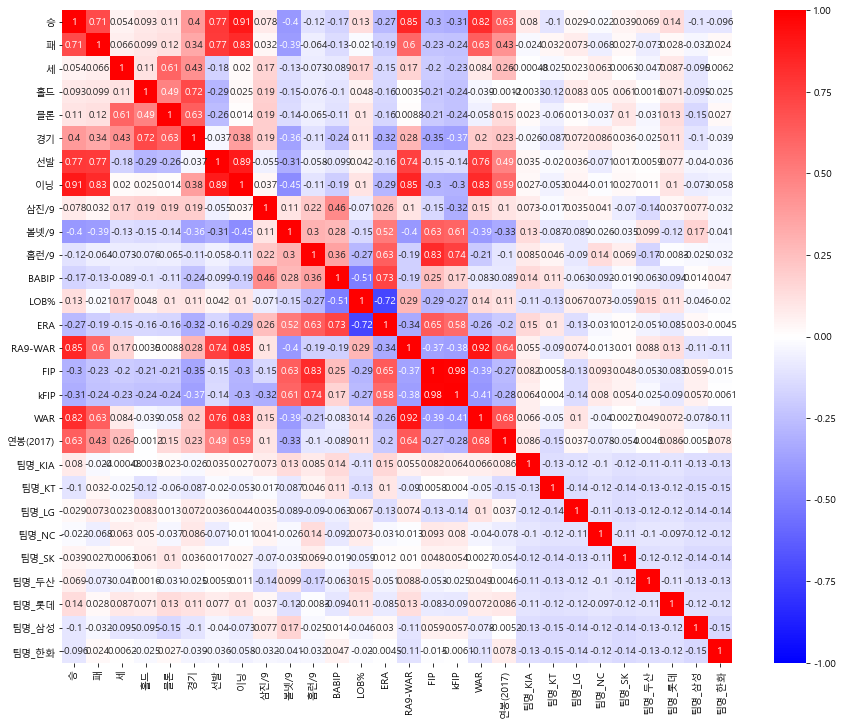

In [15]:
# 히트맵
plt.figure(figsize=(15,12))
sns.heatmap(x_dataOneH.corr(), annot=True, vmin=-1, vmax=1, cmap='bwr')
plt.show()

In [16]:
# 다중공선성 확인
vif = pd.DataFrame()
vif['VIF Factor'] = [variance_inflation_factor(x_dataOneH.values, i) for i in range(x_dataOneH.shape[1])]
vif['features'] = x_dataOneH.columns
vif

,VIF Factor,features
0,7.969674,승
1,5.883327,패
2,3.120906,세
3,3.765144,홀드
4,2.979844,블론
5,14.620874,경기
6,39.587016,선발
7,63.817732,이닝
8,89.484808,삼진/9
9,57.840351,볼넷/9


In [17]:
# get_dummies 쓴 거 말고 원래 x_data에 다중공선성 제일 높은 'FIP', 'kFIP' 삭제
x_data = x_data.drop(['FIP', 'kFIP'], axis=1)
x_data.columns

Index(['팀명', '승', '패', '세', '홀드', '블론', '경기', '선발', '이닝', '삼진/9', '볼넷/9',
       '홈런/9', 'BABIP', 'LOB%', 'ERA', 'RA9-WAR', 'WAR', '연봉(2017)'],
      dtype='object')

In [18]:
# 학습데이터 & 테스트 데이터
x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size=0.2, random_state=1)

In [19]:
# 모델링
myt = make_column_transformer((OneHotEncoder(), ['팀명']))

model_SGD2= make_pipeline(myt, StandardScaler(), SGDRegressor())
param_value_SGD2 = {'sgdregressor__alpha':[0.001,0.01,0,1], 'standardscaler__with_mean':[True,False]}
gridS_SGD2 = GridSearchCV(model_SGD2, param_grid=param_value_SGD2 ,scoring='r2',cv =5, verbose=1)
gridS_SGD2.fit(x_train, y_train)

Fitting 5 folds for each of 8 candidates, totalling 40 fits


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('columntransformer',
                                        ColumnTransformer(transformers=[('onehotencoder',
                                                                         OneHotEncoder(),
                                                                         ['팀명'])])),
                                       ('standardscaler', StandardScaler()),
                                       ('sgdregressor', SGDRegressor())]),
             param_grid={'sgdregressor__alpha': [0.001, 0.01, 0, 1],
                         'standardscaler__with_mean': [True, False]},
             scoring='r2', verbose=1)

In [20]:
gridS_SGD2.best_estimator_.score(x_train, y_train)

-0.03360963480153134

In [21]:
gridS_SGD2.best_estimator_.score(x_test, y_test)

-0.12183538055675269

### 3) Lasso 모델을 이용하여 r2 점수(train, test )를 출력하시오.

In [22]:
# 기존 데이터 x, y 나누기
x_data = df1.drop(['연봉(2018)'], axis=1)
y_data = df1['연봉(2018)']

display(x_data)
display(y_data)

display(x_data.info())

,팀명,승,패,세,홀드,블론,경기,선발,이닝,삼진/9,볼넷/9,홈런/9,BABIP,LOB%,ERA,RA9-WAR,FIP,kFIP,WAR,연봉(2017)
0,SK,16,7,0,0,0,30,30,190.0,8.95,2.13,0.76,0.342,73.7,3.60,6.91,3.69,3.44,6.62,85000
1,LG,11,11,1,0,0,30,29,185.1,7.43,1.85,0.53,0.319,67.1,3.88,6.80,3.52,3.41,6.08,50000
2,KIA,20,6,0,0,0,31,31,193.1,7.36,2.09,0.79,0.332,72.1,3.44,6.54,3.94,3.82,5.64,150000
3,LG,10,7,0,0,0,28,28,175.2,8.04,1.95,1.02,0.298,75.0,3.43,6.11,4.20,4.03,4.63,100000
4,롯데,13,7,0,0,0,30,30,187.1,7.49,2.11,0.91,0.323,74.1,3.80,6.13,4.36,4.31,4.38,85000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
147,한화,2,5,0,0,2,33,5,62.2,4.31,3.30,1.58,0.355,56.9,7.76,-1.21,6.21,6.48,-0.47,8100
148,KIA,3,2,0,0,0,25,11,59.1,4.85,5.61,1.06,0.263,65.4,5.92,0.39,6.41,6.77,-0.49,3100
149,롯데,0,2,0,0,0,9,2,14.2,4.91,4.91,2.45,0.382,52.8,11.66,-0.83,8.03,8.29,-0.61,16000
150,삼성,0,3,0,1,0,41,0,43.2,7.63,7.01,1.44,0.341,73.9,5.77,-0.40,6.87,6.95,-0.70,2900


0      140000
1      120000
2      230000
3      100000
4      111000
        ...  
147      7100
148      7500
149     10000
150      4000
151      4000
Name: 연봉(2018), Length: 152, dtype: int64

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 152 entries, 0 to 151
Data columns (total 20 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   팀명        152 non-null    object 
 1   승         152 non-null    int64  
 2   패         152 non-null    int64  
 3   세         152 non-null    int64  
 4   홀드        152 non-null    int64  
 5   블론        152 non-null    int64  
 6   경기        152 non-null    int64  
 7   선발        152 non-null    int64  
 8   이닝        152 non-null    float64
 9   삼진/9      152 non-null    float64
 10  볼넷/9      152 non-null    float64
 11  홈런/9      152 non-null    float64
 12  BABIP     152 non-null    float64
 13  LOB%      152 non-null    float64
 14  ERA       152 non-null    float64
 15  RA9-WAR   152 non-null    float64
 16  FIP       152 non-null    float64
 17  kFIP      152 non-null    float64
 18  WAR       152 non-null    float64
 19  연봉(2017)  152 non-null    int64  
dtypes: float64(11), int64(8), object

None

In [45]:
x_data = x_data.iloc[:,1:]

In [46]:
x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size=0.2, random_state=1)

In [47]:
x_train

,팀명,승,패,세,홀드,블론,경기,선발,이닝,삼진/9,볼넷/9,홈런/9,BABIP,LOB%,ERA,RA9-WAR,FIP,kFIP,WAR,연봉(2017)
19,롯데,1,3,37,0,5,61,0,62.0,9.00,1.60,1.02,0.311,89.9,2.18,3.91,3.69,3.37,1.82,70000
113,SK,2,2,0,3,1,21,6,41.1,7.40,4.14,1.74,0.379,68.2,6.53,0.07,6.13,6.09,-0.06,2800
103,두산,0,0,0,0,0,1,0,1.0,0.00,9.00,0.00,0.000,100.0,0.00,0.04,6.73,7.64,-0.01,2700
77,SK,5,3,7,16,4,61,0,68.0,6.49,4.37,1.19,0.258,76.2,3.57,2.59,5.34,5.39,0.13,8000
145,삼성,2,0,0,0,0,30,0,31.2,7.11,6.25,2.56,0.276,81.9,5.12,0.31,8.03,8.03,-0.44,6200
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
133,KIA,7,4,11,6,6,65,1,80.1,7.39,5.27,1.12,0.267,75.0,4.59,1.89,5.54,5.53,-0.20,4700
137,롯데,3,1,0,2,1,24,0,26.2,3.71,2.70,1.69,0.307,71.4,5.40,0.19,6.47,6.83,-0.24,15000
72,KT,0,2,0,0,0,4,3,11.1,6.35,4.76,0.00,0.400,50.0,9.53,-0.13,4.44,4.67,0.18,3000
140,KT,0,2,0,1,0,37,1,39.0,5.08,3.92,1.62,0.294,68.3,6.23,0.25,6.40,6.63,-0.28,6300


In [51]:
myt = make_column_transformer( (OneHotEncoder(), ['팀명']), remainder='passthrough' )

In [52]:
model_Lasso = make_pipeline(myt, StandardScaler(), Lasso())
param_value_Lasso = {'lasso__alpha' : [0.001, 0.01, 0.1, 0, 1, 2, 3],'standardscaler__with_mean': [True, False]}
gridS_Lasso = GridSearchCV(model_Lasso, param_grid=param_value_Lasso, scoring='r2', cv = 5, verbose=1)
gridS_Lasso.fit(x_train,y_train)

Fitting 5 folds for each of 14 candidates, totalling 70 fits


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('columntransformer',
                                        ColumnTransformer(remainder='passthrough',
                                                          transformers=[('onehotencoder',
                                                                         OneHotEncoder(),
                                                                         ['팀명'])])),
                                       ('standardscaler', StandardScaler()),
                                       ('lasso', Lasso())]),
             param_grid={'lasso__alpha': [0.001, 0.01, 0.1, 0, 1, 2, 3],
                         'standardscaler__with_mean': [True, False]},
             scoring='r2', verbose=1)

In [53]:
gridS_Lasso.best_estimator_.score(x_train,y_train)

0.9382699681088819

In [54]:
gridS_Lasso.best_estimator_.score(x_test,y_test)

0.6660605447524346

### 4) [KIA,20,6,0,0,0,31,31,193.1,7.36,2.09,0.79,0.332,72.1,3.44,6.54,3.94,3.82,5.64,150000]의 연봉(2018)을 예측하시오

In [28]:
x_data = df1.drop(['연봉(2018)'], axis=1)
y_data = df1['연봉(2018)']

display(x_data)
display(y_data)

display(x_data.info())

,팀명,승,패,세,홀드,블론,경기,선발,이닝,삼진/9,볼넷/9,홈런/9,BABIP,LOB%,ERA,RA9-WAR,FIP,kFIP,WAR,연봉(2017)
0,SK,16,7,0,0,0,30,30,190.0,8.95,2.13,0.76,0.342,73.7,3.60,6.91,3.69,3.44,6.62,85000
1,LG,11,11,1,0,0,30,29,185.1,7.43,1.85,0.53,0.319,67.1,3.88,6.80,3.52,3.41,6.08,50000
2,KIA,20,6,0,0,0,31,31,193.1,7.36,2.09,0.79,0.332,72.1,3.44,6.54,3.94,3.82,5.64,150000
3,LG,10,7,0,0,0,28,28,175.2,8.04,1.95,1.02,0.298,75.0,3.43,6.11,4.20,4.03,4.63,100000
4,롯데,13,7,0,0,0,30,30,187.1,7.49,2.11,0.91,0.323,74.1,3.80,6.13,4.36,4.31,4.38,85000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
147,한화,2,5,0,0,2,33,5,62.2,4.31,3.30,1.58,0.355,56.9,7.76,-1.21,6.21,6.48,-0.47,8100
148,KIA,3,2,0,0,0,25,11,59.1,4.85,5.61,1.06,0.263,65.4,5.92,0.39,6.41,6.77,-0.49,3100
149,롯데,0,2,0,0,0,9,2,14.2,4.91,4.91,2.45,0.382,52.8,11.66,-0.83,8.03,8.29,-0.61,16000
150,삼성,0,3,0,1,0,41,0,43.2,7.63,7.01,1.44,0.341,73.9,5.77,-0.40,6.87,6.95,-0.70,2900


0      140000
1      120000
2      230000
3      100000
4      111000
        ...  
147      7100
148      7500
149     10000
150      4000
151      4000
Name: 연봉(2018), Length: 152, dtype: int64

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 152 entries, 0 to 151
Data columns (total 20 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   팀명        152 non-null    object 
 1   승         152 non-null    int64  
 2   패         152 non-null    int64  
 3   세         152 non-null    int64  
 4   홀드        152 non-null    int64  
 5   블론        152 non-null    int64  
 6   경기        152 non-null    int64  
 7   선발        152 non-null    int64  
 8   이닝        152 non-null    float64
 9   삼진/9      152 non-null    float64
 10  볼넷/9      152 non-null    float64
 11  홈런/9      152 non-null    float64
 12  BABIP     152 non-null    float64
 13  LOB%      152 non-null    float64
 14  ERA       152 non-null    float64
 15  RA9-WAR   152 non-null    float64
 16  FIP       152 non-null    float64
 17  kFIP      152 non-null    float64
 18  WAR       152 non-null    float64
 19  연봉(2017)  152 non-null    int64  
dtypes: float64(11), int64(8), object

None

In [29]:
x_train,x_test,y_train,y_test = train_test_split(x_data,y_data, test_size=0.2, random_state=1)

In [30]:
myt = make_column_transformer((OneHotEncoder(), ['팀명']))

In [31]:
# 앞에서 풀었던 세가지 모델에 모두 적용
# input값 정의
x = np.array([['KIA',20,6,0,0,0,31,31,193.1,7.36,2.09,0.79,0.332,72.1,3.44,6.54,3.94,3.82,5.64,150000]])
x_df = pd.DataFrame(x, columns=x_train.columns)
display(x_df)

# SGD
print('SGDRegressor: ', gridS_SGD.best_estimator_.predict(x_df))
# Lasso
print('Lasso: ', gridS_Lasso.best_estimator_.predict(x_df))
# 다중공선성이 높았던 'FIP', 'kFIP' 제외한 SGD
x_df = x_df.drop(['FIP', 'kFIP'], axis=1)
print('SGDRegressor except to FIP and kFIP: ', gridS_SGD2.best_estimator_.predict(x_df))

,팀명,승,패,세,홀드,블론,경기,선발,이닝,삼진/9,볼넷/9,홈런/9,BABIP,LOB%,ERA,RA9-WAR,FIP,kFIP,WAR,연봉(2017)
0,KIA,20,6,0,0,0,31,31,193.1,7.36,2.09,0.79,0.332,72.1,3.44,6.54,3.94,3.82,5.64,150000


SGDRegressor:  [16567.23898462]
Lasso:  [30964.63508392]
SGDRegressor except to FIP and kFIP:  [17307.64895304]


### 5) 팀별 평균 연봉(2018) Top5 를 구하시오.

In [32]:
baseball_df.head()

,선수명,팀명,승,패,세,홀드,블론,경기,선발,이닝,...,홈런/9,BABIP,LOB%,ERA,RA9-WAR,FIP,kFIP,WAR,연봉(2018),연봉(2017)
0,켈리,SK,16,7,0,0,0,30,30,190.0,...,0.76,0.342,73.7,3.60,6.91,3.69,3.44,6.62,140000,85000
1,소사,LG,11,11,1,0,0,30,29,185.1,...,0.53,0.319,67.1,3.88,6.80,3.52,3.41,6.08,120000,50000
2,양현종,KIA,20,6,0,0,0,31,31,193.1,...,0.79,0.332,72.1,3.44,6.54,3.94,3.82,5.64,230000,150000
3,차우찬,LG,10,7,0,0,0,28,28,175.2,...,1.02,0.298,75.0,3.43,6.11,4.20,4.03,4.63,100000,100000
4,레일리,롯데,13,7,0,0,0,30,30,187.1,...,0.91,0.323,74.1,3.80,6.13,4.36,4.31,4.38,111000,85000


In [33]:
df_avg = baseball_df.groupby('팀명')[['연봉(2018)']].mean()
df_avg.sort_values(['연봉(2018)'], ascending=False).head()

,연봉(2018)
팀명,
KIA,29440.000000
롯데,26707.142857
LG,23444.444444
한화,21720.000000
두산,17980.000000


### 6) 팀별 연봉상승률(2017->2018)을 구하시오.

In [34]:
# 각 선수별 연봉 상승률을 구한 후 팀별 평균 연봉 상승률
df_case1 = baseball_df.copy()
df_case1['연봉상승률'] = (df_case1['연봉(2018)'] - df_case1['연봉(2017)'])/df_case1['연봉(2017)'] * 100
display(df_case1.head())
display(df_case1.groupby('팀명')[['연봉상승률']].mean())

,선수명,팀명,승,패,세,홀드,블론,경기,선발,이닝,...,BABIP,LOB%,ERA,RA9-WAR,FIP,kFIP,WAR,연봉(2018),연봉(2017),연봉상승률
0,켈리,SK,16,7,0,0,0,30,30,190.0,...,0.342,73.7,3.60,6.91,3.69,3.44,6.62,140000,85000,64.705882
1,소사,LG,11,11,1,0,0,30,29,185.1,...,0.319,67.1,3.88,6.80,3.52,3.41,6.08,120000,50000,140.000000
2,양현종,KIA,20,6,0,0,0,31,31,193.1,...,0.332,72.1,3.44,6.54,3.94,3.82,5.64,230000,150000,53.333333
3,차우찬,LG,10,7,0,0,0,28,28,175.2,...,0.298,75.0,3.43,6.11,4.20,4.03,4.63,100000,100000,0.000000
4,레일리,롯데,13,7,0,0,0,30,30,187.1,...,0.323,74.1,3.80,6.13,4.36,4.31,4.38,111000,85000,30.588235


,연봉상승률
팀명,
KIA,45.175081
KT,30.359514
LG,32.179640
NC,14.807446
SK,26.454403
두산,24.799844
롯데,34.837101
삼성,11.340489
한화,8.678091


In [35]:
# 팀별로 연봉의 합을 구해서 전체 증가율
df_case2 = baseball_df.copy()
df_case2 = df_case2.groupby('팀명').sum()

df_case2['연봉상승률'] = (df_case2['연봉(2018)'] - df_case2['연봉(2017)'])/df_case2['연봉(2017)'] * 100
display(df_case2)

,승,패,세,홀드,블론,경기,선발,이닝,삼진/9,볼넷/9,...,BABIP,LOB%,ERA,RA9-WAR,FIP,kFIP,WAR,연봉(2018),연봉(2017),연봉상승률
팀명,,,,,,,,,,,,,,,,,,,,,
KIA,62,44,22,39,15,410,107,914.8,115.09,76.93,...,5.676,968.8,118.83,20.43,89.57,88.80,13.96,441600,344800,28.074246
KT,41,65,22,23,12,464,106,948.3,131.48,69.13,...,6.946,1223.6,135.69,11.78,105.17,105.60,9.37,193500,127500,51.764706
LG,63,68,32,66,17,588,127,1134.6,131.79,65.01,...,5.855,1271.7,82.80,25.67,86.81,86.52,18.72,422000,341900,23.427903
NC,38,32,32,44,9,446,50,717.2,96.61,51.80,...,4.078,926.6,73.13,12.75,78.99,78.72,6.44,147600,131800,11.987860
SK,65,61,28,61,24,553,118,1092.3,117.14,71.28,...,6.048,1199.8,111.19,19.95,103.51,104.89,12.16,310600,231100,34.400692
두산,60,37,12,40,11,411,94,879.7,87.70,73.31,...,4.853,1108.7,81.03,23.20,78.13,80.79,12.90,269700,252800,6.685127
롯데,68,48,39,51,22,500,118,1027.4,103.27,45.82,...,4.400,1014.4,69.08,25.25,70.33,69.66,13.49,373900,325700,14.798895
삼성,44,58,6,31,5,475,102,951.9,152.08,103.82,...,6.875,1343.2,127.28,11.13,115.81,116.49,8.07,284400,323400,-12.059369
한화,45,67,31,47,20,538,104,990.8,136.38,78.76,...,7.026,1358.7,119.97,10.49,108.72,110.12,6.11,434400,429800,1.070265


### 3번 '선수명도 포함이었던 것 같은데 ...


In [36]:
x_data = baseball_df.drop(['연봉(2018)'], axis=1)
y_data = baseball_df['연봉(2018)']

display(x_data)
display(y_data)

x_data.info()

,선수명,팀명,승,패,세,홀드,블론,경기,선발,이닝,...,볼넷/9,홈런/9,BABIP,LOB%,ERA,RA9-WAR,FIP,kFIP,WAR,연봉(2017)
0,켈리,SK,16,7,0,0,0,30,30,190.0,...,2.13,0.76,0.342,73.7,3.60,6.91,3.69,3.44,6.62,85000
1,소사,LG,11,11,1,0,0,30,29,185.1,...,1.85,0.53,0.319,67.1,3.88,6.80,3.52,3.41,6.08,50000
2,양현종,KIA,20,6,0,0,0,31,31,193.1,...,2.09,0.79,0.332,72.1,3.44,6.54,3.94,3.82,5.64,150000
3,차우찬,LG,10,7,0,0,0,28,28,175.2,...,1.95,1.02,0.298,75.0,3.43,6.11,4.20,4.03,4.63,100000
4,레일리,롯데,13,7,0,0,0,30,30,187.1,...,2.11,0.91,0.323,74.1,3.80,6.13,4.36,4.31,4.38,85000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
147,장민재,한화,2,5,0,0,2,33,5,62.2,...,3.30,1.58,0.355,56.9,7.76,-1.21,6.21,6.48,-0.47,8100
148,정용운,KIA,3,2,0,0,0,25,11,59.1,...,5.61,1.06,0.263,65.4,5.92,0.39,6.41,6.77,-0.49,3100
149,노경은,롯데,0,2,0,0,0,9,2,14.2,...,4.91,2.45,0.382,52.8,11.66,-0.83,8.03,8.29,-0.61,16000
150,김승현,삼성,0,3,0,1,0,41,0,43.2,...,7.01,1.44,0.341,73.9,5.77,-0.40,6.87,6.95,-0.70,2900


0      140000
1      120000
2      230000
3      100000
4      111000
        ...  
147      7100
148      7500
149     10000
150      4000
151      4000
Name: 연봉(2018), Length: 152, dtype: int64

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 152 entries, 0 to 151
Data columns (total 21 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   선수명       152 non-null    object 
 1   팀명        152 non-null    object 
 2   승         152 non-null    int64  
 3   패         152 non-null    int64  
 4   세         152 non-null    int64  
 5   홀드        152 non-null    int64  
 6   블론        152 non-null    int64  
 7   경기        152 non-null    int64  
 8   선발        152 non-null    int64  
 9   이닝        152 non-null    float64
 10  삼진/9      152 non-null    float64
 11  볼넷/9      152 non-null    float64
 12  홈런/9      152 non-null    float64
 13  BABIP     152 non-null    float64
 14  LOB%      152 non-null    float64
 15  ERA       152 non-null    float64
 16  RA9-WAR   152 non-null    float64
 17  FIP       152 non-null    float64
 18  kFIP      152 non-null    float64
 19  WAR       152 non-null    float64
 20  연봉(2017)  152 non-null    int64 

In [37]:
x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size=0.2, random_state=1)
display(x_test)
myt = make_column_transformer((OneHotEncoder(), ['선수명','팀명']))

model_Lasso = make_pipeline(myt, StandardScaler(), Lasso())
param_value_Lasso = {'lasso__alpha' : [0, 1, 2, 3],'standardscaler__with_mean': [False,True]}
gridS_Lasso = GridSearchCV(model_Lasso, param_grid=param_value_Lasso, scoring='r2'
                          )
gridS_Lasso.fit(x_train,y_train)

display(gridS_Lasso.best_estimator_.score(x_train,y_train))
display(gridS_Lasso.best_estimator_.score(x_test,y_test))

,선수명,팀명,승,패,세,홀드,블론,경기,선발,이닝,...,볼넷/9,홈런/9,BABIP,LOB%,ERA,RA9-WAR,FIP,kFIP,WAR,연봉(2017)
59,권오준,삼성,1,2,0,1,1,45,0,56.0,...,2.25,1.77,0.324,72.1,5.14,1.16,5.29,5.05,0.28,10500
33,윤규진,한화,8,7,0,2,0,36,18,119.0,...,3.33,1.44,0.328,72.1,5.22,2.23,5.46,5.42,1.09,18000
69,최지광,삼성,0,2,0,0,0,11,6,25.0,...,7.92,0.72,0.351,64.3,6.48,-0.16,5.69,5.65,0.21,2700
127,홍상삼,두산,1,1,0,0,0,11,2,17.0,...,5.82,1.06,0.300,53.0,7.94,-0.52,6.73,7.22,-0.18,12500
31,김원중,롯데,7,8,0,0,0,24,24,107.1,...,4.70,1.09,0.347,70.3,5.70,2.22,5.53,5.56,1.23,3000
107,안규현,삼성,0,0,0,0,0,1,0,2.0,...,13.50,0.00,0.333,66.7,9.00,-0.04,8.73,9.67,-0.04,2800
97,임진우,두산,0,0,0,0,0,1,0,1.0,...,9.00,0.00,0.667,40.0,27.00,-0.11,4.73,4.61,0.00,3200
14,백정현,삼성,8,4,0,3,0,35,14,100.2,...,3.22,0.98,0.336,73.2,4.38,3.01,4.51,4.34,2.25,10000
53,문광은,SK,2,4,2,5,0,46,0,44.2,...,4.03,1.01,0.362,57.4,7.05,0.06,4.83,4.72,0.44,4500
44,이동현,LG,3,6,7,5,3,45,0,50.2,...,1.78,0.71,0.329,58.9,4.80,1.22,3.64,3.59,0.68,60000


0.9999999998436105

ValueError: Found unknown categories ['피어밴드', '김원중', '홍건희', '홍상삼', '신정락', '정수민', '민태호', '이형범', '장민익', '윤규진', '김도영', '황수범', '최지광', '정재원', '권오준', '안규현', '이현호', '이동현', '차재용', '박상원', '백정현', '류제국', '임진우', '진해수', '김강률', '최동환', '안영명', '문광은', '주권', '최성훈', '임현준'] in column 0 during transform

선수명은 다 다른데 train, test로 나누면 train에 있는 선수명은 test에 없으므로 어짜피 안되는 거 아닌가?